开始房屋数据分析...
正在从文件加载数据: C:/Users/25339/Desktop/pyhon/HW3/合订数据.xlsx
文件中所有sheet名称: ['磁器口_二手房', '磁器口_租房', '三峡广场_二手房', '三峡广场_租房', '大学城_二手房', '大学城_租房', '陈家桥_二手房', '陈家桥_租房']
正在加载二手房数据: 磁器口 -> 磁器口_二手房
正在加载二手房数据: 三峡广场 -> 三峡广场_二手房
正在加载二手房数据: 大学城 -> 大学城_二手房
正在加载二手房数据: 陈家桥 -> 陈家桥_二手房
正在加载租房数据: 磁器口 -> 磁器口_租房
正在加载租房数据: 三峡广场 -> 三峡广场_租房
正在加载租房数据: 大学城 -> 大学城_租房
正在加载租房数据: 陈家桥 -> 陈家桥_租房
数据加载完成!
二手房总记录数: 4138
租房总记录数: 2847

处理二手房数据...
列名: ['总价格', '平米价格', '面积', '地点']
二手房数据处理完成: 4138 条有效记录
平米价格范围: 3528 - 37038 元/㎡
面积范围: 26.7 - 391.7 ㎡

处理租房数据...
列名: ['面积（㎡）', '每月租价（元）', '地点']
租房数据处理完成: 2847 条有效记录
整套月租金范围: 300 - 15000 元/月
面积范围: 20.0 - 400.0 ㎡
每平米租金范围: 1.5 - 150.0 元/㎡/月
平均每平米租金: 25.6 元/㎡/月

数据处理完成!
二手房有效记录: 4138
租房有效记录: 2847

各区域数据分布:
二手房: {'磁器口': 1481, '三峡广场': 1200, '大学城': 1200, '陈家桥': 257}
租房: {'三峡广场': 1200, '大学城': 1200, '磁器口': 399, '陈家桥': 48}

数据描述和异常值分析

--- 磁器口 ---
房价/m²统计:
  样本数量: 1481
  均值: 12731.10 元/㎡
  中位数: 11861.00 元/㎡
  标准差: 4736.33
  价格范围: 3903.00 - 37038.00 元/㎡
租金/m²统计:
  样本数量: 399
  均值: 24.60 元/

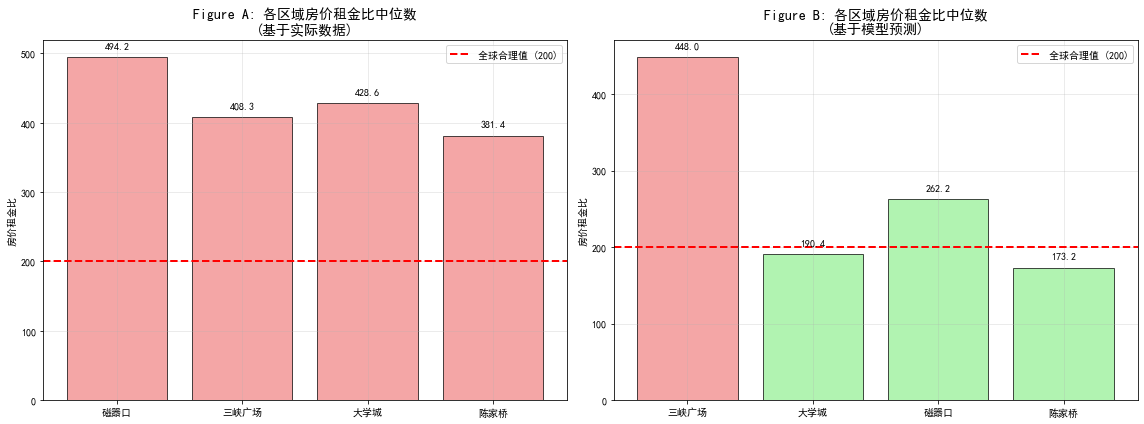


实际数据 vs 模型预测对比
磁器口: 实际=494.2(偏高), 预测=262.2(偏高), 差异=-232.0(-46.9%)
三峡广场: 实际=408.3(偏高), 预测=448.0(偏高), 差异=+39.7(+9.7%)
大学城: 实际=428.6(偏高), 预测=190.4(合理), 差异=-238.1(-55.6%)
陈家桥: 实际=381.4(偏高), 预测=173.2(合理), 差异=-208.2(-54.6%)

分析完成!
分析 4 个区域
Figure A: 基于实际数据的中位数
Figure B: 基于模型预测的中位数


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 实现简单的线性回归类
class SimpleLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # 添加截距项
        X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
        
        # 使用正规方程求解：(X^T X)^(-1) X^T y
        try:
            coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
            self.intercept_ = coefficients[0]
            self.coef_ = coefficients[1:]
        except np.linalg.LinAlgError:
            # 如果矩阵不可逆，使用伪逆
            coefficients = np.linalg.pinv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
            self.intercept_ = coefficients[0]
            self.coef_ = coefficients[1:]
    
    def predict(self, X):
        if self.coef_ is None or self.intercept_ is None:
            raise ValueError("Model not fitted yet")
        return self.intercept_ + X @ self.coef_

FILE_PATH = "C:/Users/25339/Desktop/pyhon/HW3/合订数据.xlsx" 

SHEET_CONFIG = {
    '二手房价_sheets': {
        '磁器口': '磁器口_二手房',  
        '三峡广场': '三峡广场_二手房',
        '大学城': '大学城_二手房', 
        '陈家桥': '陈家桥_二手房' 
    },
    '租房_sheets': {
        '磁器口': '磁器口_租房',      
        '三峡广场': '三峡广场_租房',  
        '大学城': '大学城_租房',   
        '陈家桥': '陈家桥_租房' 
    }
}

class HousingAnalysis:
    def __init__(self, file_path, sheet_config):
        self.file_path = file_path
        self.sheet_config = sheet_config
        self.price_data = None
        self.rent_data = None
        self.actual_ratios = None
        self.predicted_ratios = None
        self.model1 = SimpleLinearRegression()
        self.model2 = SimpleLinearRegression()
        
    def load_data_from_excel(self):
        """从Excel文件加载多个sheet的数据"""
        print(f"正在从文件加载数据: {self.file_path}")
        
        try:
            excel_file = pd.ExcelFile(self.file_path)
            all_sheet_names = excel_file.sheet_names
            print(f"文件中所有sheet名称: {all_sheet_names}")
            
            # 检查配置的sheet是否存在
            missing_sheets = []
            for sheet_type, sheets in self.sheet_config.items():
                for location, sheet_name in sheets.items():
                    if sheet_name not in all_sheet_names:
                        missing_sheets.append(sheet_name)
            
            if missing_sheets:
                print(f"以下sheet在文件中不存在: {missing_sheets}")
                return None, None
            
            # 加载所有二手房数据
            all_price_data = []
            for location, sheet_name in self.sheet_config['二手房价_sheets'].items():
                print(f"正在加载二手房数据: {location} -> {sheet_name}")
                df = pd.read_excel(self.file_path, sheet_name=sheet_name)
                df['地点'] = location
                all_price_data.append(df)
            
            # 加载所有租房数据
            all_rent_data = []
            for location, sheet_name in self.sheet_config['租房_sheets'].items():
                print(f"正在加载租房数据: {location} -> {sheet_name}")
                df = pd.read_excel(self.file_path, sheet_name=sheet_name)
                df['地点'] = location
                all_rent_data.append(df)
            
            # 合并数据
            price_combined = pd.concat(all_price_data, ignore_index=True)
            rent_combined = pd.concat(all_rent_data, ignore_index=True)
            
            print(f"数据加载完成!")
            print(f"二手房总记录数: {len(price_combined)}")
            print(f"租房总记录数: {len(rent_combined)}")
            
            return price_combined, rent_combined
            
        except Exception as e:
            print(f"数据加载失败: {e}")
            import traceback
            traceback.print_exc()
            return None, None
    
    def process_price_data(self, price_df):
        """处理二手房数据 - 直接使用平米价格"""
        print("\n处理二手房数据...")
        print(f"列名: {price_df.columns.tolist()}")
        
        # 检查必要列是否存在
        required_cols = ['平米价格', '面积', '地点']
        missing_cols = [col for col in required_cols if col not in price_df.columns]
        if missing_cols:
            print(f"缺少必要列: {missing_cols}")
            return None
        
        # 创建清理后的DataFrame
        cleaned_df = price_df[required_cols].copy()
        
        # 数据清洗
        cleaned_df = cleaned_df.dropna(subset=required_cols)
        
        # 确保数据类型正确
        cleaned_df['平米价格'] = pd.to_numeric(cleaned_df['平米价格'], errors='coerce')
        cleaned_df['面积'] = pd.to_numeric(cleaned_df['面积'], errors='coerce')
        
        # 移除无效数据
        cleaned_df = cleaned_df[(cleaned_df['平米价格'] > 0) & (cleaned_df['面积'] > 0)]
        cleaned_df = cleaned_df.dropna(subset=['平米价格', '面积'])
        
        # 直接使用平米价格
        cleaned_df['price_per_m2'] = cleaned_df['平米价格']
        
        print(f"二手房数据处理完成: {len(cleaned_df)} 条有效记录")
        print(f"平米价格范围: {cleaned_df['price_per_m2'].min():.0f} - {cleaned_df['price_per_m2'].max():.0f} 元/㎡")
        print(f"面积范围: {cleaned_df['面积'].min():.1f} - {cleaned_df['面积'].max():.1f} ㎡")
        
        return cleaned_df[['平米价格', '面积', '地点', 'price_per_m2']]
    
    def process_rent_data(self, rent_df):
        """处理租房数据 - 月租金需要除以面积得到每平米租金"""
        print("\n处理租房数据...")
        print(f"列名: {rent_df.columns.tolist()}")
        
        # 检查必要列是否存在
        required_cols = ['每月租价（元）', '面积（㎡）', '地点']
        missing_cols = [col for col in required_cols if col not in rent_df.columns]
        if missing_cols:
            print(f"缺少必要列: {missing_cols}")
            return None
        
        # 创建清理后的DataFrame
        cleaned_df = rent_df[required_cols].copy()
        
        # 重命名列为标准名称
        cleaned_df = cleaned_df.rename(columns={
            '每月租价（元）': '月租金',
            '面积（㎡）': '面积'
        })
        
        # 数据清洗
        cleaned_df = cleaned_df.dropna(subset=['月租金', '面积', '地点'])
        
        # 确保数据类型正确
        cleaned_df['月租金'] = pd.to_numeric(cleaned_df['月租金'], errors='coerce')
        cleaned_df['面积'] = pd.to_numeric(cleaned_df['面积'], errors='coerce')
        
        # 移除无效数据
        cleaned_df = cleaned_df[(cleaned_df['月租金'] > 0) & (cleaned_df['面积'] > 0)]
        cleaned_df = cleaned_df.dropna(subset=['月租金', '面积'])
        
        # 关键：月租金除以面积得到每平米租金
        cleaned_df['rent_per_m2'] = cleaned_df['月租金'] / cleaned_df['面积']
        
        print(f"租房数据处理完成: {len(cleaned_df)} 条有效记录")
        print(f"整套月租金范围: {cleaned_df['月租金'].min():.0f} - {cleaned_df['月租金'].max():.0f} 元/月")
        print(f"面积范围: {cleaned_df['面积'].min():.1f} - {cleaned_df['面积'].max():.1f} ㎡")
        print(f"每平米租金范围: {cleaned_df['rent_per_m2'].min():.1f} - {cleaned_df['rent_per_m2'].max():.1f} 元/㎡/月")
        print(f"平均每平米租金: {cleaned_df['rent_per_m2'].mean():.1f} 元/㎡/月")
        
        return cleaned_df[['月租金', '面积', '地点', 'rent_per_m2']]
    
    def process_data(self, price_df, rent_df):
        """处理加载的数据"""
        if price_df is None or rent_df is None:
            print("数据加载失败，无法继续处理")
            return
            
        processed_price = self.process_price_data(price_df)
        if processed_price is None:
            print("二手房数据处理失败")
            return
        
        processed_rent = self.process_rent_data(rent_df)
        if processed_rent is None:
            print("租房数据处理失败")
            return
        
        self.price_data = processed_price
        self.rent_data = processed_rent
        
        print(f"\n数据处理完成!")
        print(f"二手房有效记录: {len(processed_price)}")
        print(f"租房有效记录: {len(processed_rent)}")
        
        print("\n各区域数据分布:")
        print("二手房:", self.price_data['地点'].value_counts().to_dict())
        print("租房:", self.rent_data['地点'].value_counts().to_dict())

    def data_description_and_outliers(self):
        """数据描述和异常值检测"""
        print("\n" + "=" * 60)
        print("数据描述和异常值分析")
        print("=" * 60)
        
        locations = self.price_data['地点'].unique()
        
        for location in locations:
            print(f"\n--- {location} ---")
            
            # 房价数据
            price_location = self.price_data[self.price_data['地点'] == location]['price_per_m2']
            rent_location = self.rent_data[self.rent_data['地点'] == location]['rent_per_m2']
            
            print(f"房价/m²统计:")
            print(f"  样本数量: {len(price_location)}")
            print(f"  均值: {price_location.mean():.2f} 元/㎡")
            print(f"  中位数: {price_location.median():.2f} 元/㎡")
            print(f"  标准差: {price_location.std():.2f}")
            print(f"  价格范围: {price_location.min():.2f} - {price_location.max():.2f} 元/㎡")
            
            print(f"租金/m²统计:")
            print(f"  样本数量: {len(rent_location)}")
            if len(rent_location) > 0:
                print(f"  均值: {rent_location.mean():.2f} 元/㎡/月")
                print(f"  中位数: {rent_location.median():.2f} 元/㎡/月")
                print(f"  标准差: {rent_location.std():.2f}")
                print(f"  租金范围: {rent_location.min():.2f} - {rent_location.max():.2f} 元/㎡/月")

    def calculate_actual_price_rent_ratio(self):
        """计算实际数据的房价租金比"""
        print("\n" + "=" * 50)
        print("计算实际数据的房价租金比 (Figure A)")
        print("=" * 50)
        
        locations = self.price_data['地点'].unique()
        actual_ratios = {}
        
        for location in locations:
            price_data_loc = self.price_data[self.price_data['地点'] == location]['price_per_m2']
            rent_data_loc = self.rent_data[self.rent_data['地点'] == location]['rent_per_m2']
            
            if len(price_data_loc) > 0 and len(rent_data_loc) > 0:
                median_price = price_data_loc.median()
                median_rent = rent_data_loc.median()
                
                # 房价租金比 = 每平米房价 ÷ 每平米月租金
                price_rent_ratio = median_price / median_rent if median_rent > 0 else 0
                
                actual_ratios[location] = price_rent_ratio
                
                print(f"{location}: 房价{median_price:.0f}元/㎡ ÷ 租金{median_rent:.1f}元/㎡/月 = 比值{price_rent_ratio:.1f}")
        
        self.actual_ratios = pd.Series(actual_ratios)
        return self.actual_ratios

    def build_models(self):
        """建立模型1和模型2 - 使用作业要求的模型"""
        print("\n" + "=" * 50)
        print("建立回归模型")
        print("=" * 50)
        
        if len(self.price_data) == 0 or len(self.rent_data) == 0:
            print("数据不足，无法建立模型")
            return
        
        try:
            # 准备数据 - 为地点创建虚拟变量
            price_with_dummies = pd.get_dummies(self.price_data, columns=['地点'], prefix='地点')
            rent_with_dummies = pd.get_dummies(self.rent_data, columns=['地点'], prefix='地点')
            
            # 确保两个数据集的虚拟变量一致
            all_location_cols = []
            for col in price_with_dummies.columns:
                if '地点_' in col:
                    all_location_cols.append(col)
                    if col not in rent_with_dummies.columns:
                        rent_with_dummies[col] = 0
            
            for col in rent_with_dummies.columns:
                if '地点_' in col and col not in all_location_cols:
                    all_location_cols.append(col)
                    price_with_dummies[col] = 0
            
            # 模型1: price/m2 = β0 + β1*面积 + β2*location + ε
            X1_cols = ['面积'] + all_location_cols
            X1 = price_with_dummies[X1_cols].values.astype(float)
            y1 = price_with_dummies['price_per_m2'].values.astype(float)
            
            # 模型2: rent/m2 = β0 + β1*面积 + β2*location + ε  
            X2_cols = ['面积'] + all_location_cols
            X2 = rent_with_dummies[X2_cols].values.astype(float)
            y2 = rent_with_dummies['rent_per_m2'].values.astype(float)
            
            # 训练模型
            print("训练房价模型...")
            self.model1.fit(X1, y1)
            print("训练租金模型...")
            self.model2.fit(X2, y2)
            
            print("模型建立完成!")
            
        except Exception as e:
            print(f"模型建立失败: {e}")
            import traceback
            traceback.print_exc()

    def predict_and_calculate_ratio(self):
        """预测并计算房价租金比 - 使用作业要求的模型"""
        print("\n" + "=" * 50)
        print("模型预测和房价租金比计算 (Figure B)")
        print("=" * 50)
        
        try:
            all_results = []
            locations = self.price_data['地点'].unique()
            
            # 创建标准测试数据集
            standard_areas = [60, 80, 100, 120]  # 常见的房产面积
            
            for location in locations:
                print(f"处理 {location} 区域...")
                
                for area in standard_areas:
                    # 创建测试数据
                    test_data = {'面积': area}
                    
                    # 创建地点虚拟变量
                    for loc in locations:
                        test_data[f'地点_{loc}'] = 1 if loc == location else 0
                    
                    # 准备特征
                    feature_cols = ['面积'] + [f'地点_{loc}' for loc in locations]
                    X_test = np.array([[test_data[col] for col in feature_cols]])
                    
                    # 预测房价和租金
                    pred_price = self.model1.predict(X_test)[0]
                    pred_rent = self.model2.predict(X_test)[0]
                    
                    # 确保预测值为正
                    pred_price = max(pred_price, 1000)
                    pred_rent = max(pred_rent, 5)
                    
                    # 计算房价租金比
                    price_rent_ratio = pred_price / pred_rent
                    
                    all_results.append({
                        '地点': location,
                        '面积': area,
                        '预测房价': pred_price,
                        '预测租金': pred_rent,
                        'price_rent_ratio': price_rent_ratio
                    })
            
            # 合并结果并计算每个区域的中位数
            results_df = pd.DataFrame(all_results)
            median_ratios = results_df.groupby('地点')['price_rent_ratio'].median()
            
            print("\n各区域预测房价租金比中位数:")
            for location, ratio in median_ratios.items():
                print(f"{location}: {ratio:.1f}")
            
            self.predicted_ratios = median_ratios
            return self.predicted_ratios
            
        except Exception as e:
            print(f"预测过程出错: {e}")
            import traceback
            traceback.print_exc()
            return None

    def create_plots(self):
        """创建要求的图表"""
        if self.actual_ratios is None or self.predicted_ratios is None:
            print("无法创建图表：缺少数据")
            return
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Figure A: 各区域房价租金比中位数 (Homework3-3)
        colors_actual = ['lightcoral' if ratio > 300 else 'skyblue' for ratio in self.actual_ratios.values]
        bars1 = ax1.bar(self.actual_ratios.index, self.actual_ratios.values, 
                       color=colors_actual, alpha=0.7, edgecolor='black')
        ax1.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球合理值 (200)')
        ax1.set_title('Figure A: 各区域房价租金比中位数\n(基于实际数据)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('房价租金比')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        for bar, ratio in zip(bars1, self.actual_ratios.values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                    f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold')
        
        # Figure B: 各区域房价租金比中位数 (Homework3-4)
        colors_predicted = ['lightcoral' if ratio > 300 else 'lightgreen' for ratio in self.predicted_ratios.values]
        bars2 = ax2.bar(self.predicted_ratios.index, self.predicted_ratios.values, 
                       color=colors_predicted, alpha=0.7, edgecolor='black')
        ax2.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球合理值 (200)')
        ax2.set_title('Figure B: 各区域房价租金比中位数\n(基于模型预测)', fontsize=14, fontweight='bold')
        ax2.set_ylabel('房价租金比')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        for bar, ratio in zip(bars2, self.predicted_ratios.values):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                    f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # 对比分析
        print("\n" + "=" * 60)
        print("实际数据 vs 模型预测对比")
        print("=" * 60)
        for location in self.actual_ratios.index:
            actual = self.actual_ratios[location]
            predicted = self.predicted_ratios[location]
            diff = predicted - actual
            diff_percent = (diff / actual) * 100 if actual > 0 else 0
            actual_status = "偏高" if actual > 250 else "合理" if actual > 150 else "偏低"
            predicted_status = "偏高" if predicted > 250 else "合理" if predicted > 150 else "偏低"
            
            print(f"{location}: 实际={actual:.1f}({actual_status}), 预测={predicted:.1f}({predicted_status}), 差异={diff:+.1f}({diff_percent:+.1f}%)")

    def run_complete_analysis(self):
        """运行完整分析流程"""
        print("开始房屋数据分析...")
        print("=" * 60)
        
        try:
            # 1. 从文件加载数据
            price_df, rent_df = self.load_data_from_excel()
            if price_df is None or rent_df is None:
                return
                
            # 2. 处理数据
            self.process_data(price_df, rent_df)
            if self.price_data is None:
                return
                
            # 3. 数据描述和异常值检测
            self.data_description_and_outliers()
            
            # 4. 计算实际数据的房价租金比 (Figure A)
            actual_ratios = self.calculate_actual_price_rent_ratio()
            
            # 5. 建立回归模型
            self.build_models()
            
            # 6. 预测和计算房价租金比 (Figure B)
            predicted_ratios = self.predict_and_calculate_ratio()
            
            if actual_ratios is not None and predicted_ratios is not None:
                # 7. 创建图表
                self.create_plots()
                
                print("\n分析完成!")
                print(f"分析 {len(actual_ratios)} 个区域")
                print("Figure A: 基于实际数据的中位数")
                print("Figure B: 基于模型预测的中位数")
            else:
                print("\n预测过程出现问题")
                
        except Exception as e:
            print(f"\n分析失败: {e}")
            import traceback
            traceback.print_exc()

# 主程序
if __name__ == "__main__":
    analyzer = HousingAnalysis(FILE_PATH, SHEET_CONFIG)
    analyzer.run_complete_analysis()